In [ ]:
# Nome:
# RA:

# Orientações para a Prova

Por favor, leia **atentamente** todas as instruções abaixo para realizar e enviar sua prova corretamente.

## Identificação

- **Preencha** seu nome e RA no bloco de código acima.

## Formato e Envio do Arquivo

- Envie o arquivo da prova com o formato `nome_sobrenome.ipynb` (sendo o primeiro sobrenome).
  
  **Exemplos:**
  
  - Nome: Ana Maria da Silva Sauro  
    Arquivo: `ana_maria_silva.ipynb`
    
  - Nome: Arthur Porfírio de Castro Siqueira  
    Arquivo: `arthur_porfirio.ipynb`
    
  - Nome: Marco Antônio Rodriges Fernandes  
    Arquivo: `marco_antonio_rodrigues.ipynb`
    
  - Nome: Flávia Melo Alcântara  
    Arquivo: `flavia_melo.ipynb`

- A prova deve ser enviada **exclusivamente** pelo formulário disponível [neste link](https://forms.gle/c5y6gW2GMSL45BTg7).

  <span style="color:red">**ATENÇÃO:**</span> A prova **NÃO** deve ser enviada para o e-mail do professor, apenas pelo formulário.

## Regras da Prova

- A prova pode ser realizada com consulta apenas em materiais das aulas anteriores ou anotações próprias.

- <span style="color:red">**Quem for pego colando terá a nota II.**</span>

- **Sem conversas paralelas** durante a prova, isto pode ser considerado cola.

- **Não** devem ser criados mais blocos de códigos que os disponíveis na prova (no desenvolvimento do código podem ser criados mais blocos de código, mas antes de enviar devem conter apenas os blocos de códigos que estavam disponíveis na prova).

- O notebook deve conter as saídas dos blocos de código referentes às questões que possuem gráficos e/ou valores que exibam as respostas (não é para limpar a saída dos blocos de código para me enviar).

## Boa Prova!

# Explicação da Prova

## Contexto

A base de dados `atraso_voos.csv` contém informações detalhadas sobre voos que foram realizados por passageiros. Cada registro (ou linha) representa o registro de **um passageiro** em um voo específico.

### Atributos da Base de Dados

Os atributos presentes na base de dados oferecem informações diversas, tais como:

- **Informações do Passageiro:** Dados específicos sobre a pessoa que realizou o voo.
  
- **Serviços Consumidos:** Detalhes sobre os serviços que foram utilizados pelo passageiro durante o voo.
  
- **Detalhes do Voo:** Informações pertinentes sobre o voo em questão.

## Objetivo da Prova

A **classe alvo**, ou seja, a variável que desejamos prever, é o **tempo de atraso para a partida** do voo.

O principal intuito desta prova é:

- Testar diferentes arquiteturas de modelos de Machine Learning.
  
- Verificar se é possível utilizar os atributos disponíveis para prever o tempo de atraso na partida dos voos utilizando técnicas de Machine Learning.
  
- Analisar o desempenho do(s) modelo(s) construído(s) com base nos dados fornecidos.

## OBS: ``Não se sabe se a base de dados possui atributos ruins e nem se só possui atributos bons.``
**Boa sorte e bom trabalho!**

# Importação de Bibliotecas

Por favor, siga as instruções abaixo com relação à importação de bibliotecas para a realização da prova.

## Orientações:

- **Centralize as Importações:** Todas as bibliotecas utilizadas devem ser importadas no bloco de código abaixo desta orientação.

- **Penalizações:**
  
  - <span style="color:red">**Menos 0.2 pontos**</span> serão descontados para cada biblioteca importada que **não for utilizada**.
    
  - <span style="color:red">**Menos 0.2 pontos**</span> serão descontados para cada biblioteca que for importada **fora do bloco de código destinado** para isso (ou seja, ao longo do código).

## Justificativa:

A organização das importações no início do notebook:
  
- Facilita a visualização das dependências do código.
  
- Previne possíveis erros de execução devido à falta de alguma biblioteca.

- Auxilia na manutenção e compreensão do código por outros desenvolvedores.

**Atenção:** Certifique-se de revisar o código antes da submissão para evitar penalizações desnecessárias.

In [73]:
# Bibliotecas utilizadas:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.regularizers import l1_l2

# Questão 1: Preparação dos Dados

Nesta etapa, você deverá realizar uma série de procedimentos para preparar os dados para os modelos de Machine Learning. Siga os passos abaixo com atenção:

**Atenção:** Certifique-se de realizar cada passo com cuidado e verificar os dados em cada etapa para garantir que a preparação dos dados seja realizada corretamente.



## A. Leitura da Base de Dados

- Realize a leitura da base de dados `atraso_voos.csv`.


In [19]:
df = pd.read_csv('atraso_voos.csv')


## B. Conversão de Valores

- Converta **valores textuais** para **valores numéricos**.
  
  **Nota:** A base de dados não contém valores nulos.


In [21]:
# Inicializando o LabelEncoder
label_encoder = LabelEncoder()

# Loop através das colunas do tipo object no DataFrame
for col in df.select_dtypes(include=['object']).columns:
    
    # Aplicando o LabelEncoder na coluna
    df[col] = label_encoder.fit_transform(df[col])
    
    # Nota: fit_transform() faz o ajuste do encoder e aplica a transformação
    # na coluna, substituindo os valores textuais por numéricos.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 22 columns):
 #   Column                                Non-Null Count   Dtype
---  ------                                --------------   -----
 0   satisfacao                            129487 non-null  int32
 1   genero                                129487 non-null  int32
 2   tipo_cliente                          129487 non-null  int32
 3   idade                                 129487 non-null  int64
 4   tipo_viagem                           129487 non-null  int32
 5   classe                                129487 non-null  int32
 6   distancia_voo                         129487 non-null  int64
 7   conforto_assento                      129487 non-null  int64
 8   conveniencia_horario_partida_chegada  129487 non-null  int64
 9   comida_bebida                         129487 non-null  int64
 10  localizacao_portao                    129487 non-null  int64
 11  servico_wifi_voo          


## C. Separação dos Dados

- Separe os dados em `X` (atributos) e `y` (variável dependente).


In [23]:
X = df.drop('atraso_partida_minutos', axis = 1)
y = df[['atraso_partida_minutos']]


## D. Divisão dos Dados

- Divida os dados em conjuntos de treinamento (60%), validação (10%) e teste (30%) para `X` e `y`.


In [25]:
# Separa os dados em X e y de treinamento e temporários
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)


# Separa os dados em X e y de validação e teste (75% para teste - 75% de 40% = 30% do total)(25% para validação - 25% de 40% = 10% do total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=42)


## E. Normalização dos Dados

- Utilize a técnica de normalização **Min-Max** para normalizar os dados.
  
  - Primeiramente, aplique o método `fit_transform` nos dados de treinamento (`X_train`).
    
  - Em seguida, utilize o método `transform` nos dados de teste (`X_test`) e validação (`X_val`).


In [26]:
scaler_X = MinMaxScaler()
scaler_y  = MinMaxScaler()

# Normaliza e ajusta o escalonizador com os dados de X de treinamento
X_train = scaler_X.fit_transform(X_train)
# Normaliza e ajusta o escalonizador com os dados de y de treinamento
y_train = scaler_y.fit_transform(y_train)

# Ajusta os dados de X_val
X_val = scaler_X.transform(X_val)
# Ajusta os dados de y_val
y_val = scaler_y.transform(y_val)

# Ajusta os dados de X_test
X_test = scaler_X.transform(X_test)
# Ajusta os dados de y_test
y_test = scaler_y.transform(y_test)


# Questão 2: Construção e Avaliação do Modelo Simples

Nesta questão, você irá construir, treinar e avaliar um modelo de rede neural simples. Siga as subinstruções com atenção para cada item.


## A - Construção do Modelo

- **Crie uma função** que retorne um modelo de rede neural compilado.
  
- O modelo deve possuir **10 camadas ocultas**.

- Na quinta camada oculta o modelo deve possuir 128 neurônios. (demais camadas fica ao seu critério)
  
- **Não** utilize técnicas de dropout e regularização do kernel no modelo.


In [65]:
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Camada de entrada
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Camada de saída
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model


## B - Treinamento do Modelo

- **Crie um modelo chamdo modelo_simples** utilizando a função criada anteriormente

- **Treine o modelo** utilizando os dados de treinamento e validação por **20 épocas**.
  
- **Exiba um gráfico** que mostre a evolução do loss de validação e treinamento ao longo das 20 épocas de treinamento.


Epoch 1/20
2428/2428 [==============================] - 5s 2ms/step - loss: 8.2469e-04 - val_loss: 7.7845e-04
Epoch 2/20
2428/2428 [==============================] - 5s 2ms/step - loss: 7.6874e-04 - val_loss: 7.6792e-04
Epoch 3/20
2428/2428 [==============================] - 5s 2ms/step - loss: 7.4489e-04 - val_loss: 7.3594e-04
Epoch 4/20
2428/2428 [==============================] - 5s 2ms/step - loss: 7.1405e-04 - val_loss: 7.6369e-04
Epoch 5/20
2428/2428 [==============================] - 5s 2ms/step - loss: 6.9129e-04 - val_loss: 7.1695e-04
Epoch 6/20
2428/2428 [==============================] - 4s 2ms/step - loss: 6.7855e-04 - val_loss: 7.7124e-04
Epoch 7/20
2428/2428 [==============================] - 5s 2ms/step - loss: 6.8228e-04 - val_loss: 6.8767e-04
Epoch 8/20
2428/2428 [==============================] - 5s 2ms/step - loss: 6.7382e-04 - val_loss: 6.7981e-04
Epoch 9/20
2428/2428 [==============================] - 5s 2ms/step - loss: 6.6037e-04 - val_loss: 6.7257e-04
Epoch 10/2

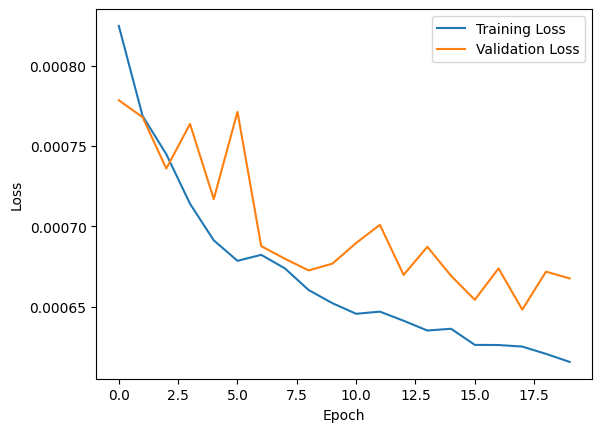

In [66]:
modelo_simples = create_model()

history = modelo_simples.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, verbose=1)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## C - Risco Empírico

- Calcule e **exiba o risco empírico** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [67]:
# Previsões
train_preds = modelo_simples.predict(X_train)

# Dessnormalização
train_preds = scaler_y.inverse_transform(train_preds)
y_real_train = scaler_y.inverse_transform(y_train)

# Cálculo do Risco Empírico
empirical_risk = mean_squared_error(y_real_train, train_preds)
print(f'Risco Empírico: {empirical_risk}')

2428/2428 [==============================] - 3s 1ms/step
Risco Empírico: 1070.0652202723525



## D - Risco Estrutural

- Calcule e **exiba o risco estrutural** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [68]:
# Previsões
test_preds = modelo_simples.predict(X_test)

# Dessnormalização
test_preds = scaler_y.inverse_transform(test_preds)
y_real_test = scaler_y.inverse_transform(y_test)

# Cálculo do Risco Estrutural
structural_risk = mean_squared_error(y_real_test, test_preds)
print(f'Risco Estrutural: {structural_risk}')


1214/1214 [==============================] - 1s 1ms/step
Risco Estrutural: 1190.465624740432



## E - Classificação do Modelo

- Com base nos valores e gráficos anteriores, **classifique o modelo** como:
  
  - Um modelo com Overfitting
  
  - Um modelo sem overfitting

### Escreva neste bloco de markdown sua resposta
Um modelo sem overfitting


## F - Justificativa

- **Justifique a sua resposta** do item 2.E, explicando os motivos que o levaram a classificar o modelo desta maneira.

Utilize **suas próprias palavras**.

### Escreva neste bloco de markdown sua resposta
Não tem overfitting pois os valores dos ríscos empírico e estrutural estão semelhantes.

# Questão 3: Construção e Avaliação do Modelo com regularização de kernel l1, l2 ou l1 e l2

Nesta questão, você irá construir, treinar e avaliar um modelo de rede neural. Siga as subinstruções com atenção para cada item.



## A - Construção do Modelo com regularização de kernel l1, l2 ou l1 e l2

- **Crie uma função** que retorne um modelo de rede neural compilado.
  
- O modelo deve possuir as mesmas **10 camadas ocultas** da questão 2.
  
- Utilize técnicas de regularização do kernel no modelo seguindo as melhores práticas de acordo com as informações dos dados.


In [69]:
def create_model_reg_ker():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Camada de entrada
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.0001)))  # Regularização aplicada
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Camada de saída
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model


## B - Justificativa das escolhas dos regularizadores de kernel

- **Justifique** a utilização o l1, l2 ou o Elastic Net (l1 e l2 juntos).

- **Justifique** a utilização do regularizador de kernel nas camadas que foram aplicadas.

### Escreva neste bloco de markdown sua resposta
Utilizei o gerularizador de kernel Elastic Net pois não se sabe se a base de dados possui atributos ruins ou se todos os atributos são bons.

A utilização em camadas mais no meio onde possui a maior quantidade deneurônios serve para simplificar um pouco a arquitetura do modelo e evitar overfitting


## C - Treinamento do Modelo

- **Crie um modelo chamdo modelo_reg_ker** utilizando a função criada anteriormente

- **Treine o modelo** utilizando os dados de treinamento por **20 épocas**.
  
- **Exiba um gráfico** que mostre a evolução do loss de validação e treinamento ao longo das 20 épocas de treinamento.


Epoch 1/10
2428/2428 [==============================] - 5s 2ms/step - loss: 0.0123 - val_loss: 0.0013
Epoch 2/10
2428/2428 [==============================] - 4s 2ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 3/10
2428/2428 [==============================] - 4s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 4/10
2428/2428 [==============================] - 4s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 5/10
2428/2428 [==============================] - 6s 3ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 6/10
2428/2428 [==============================] - 6s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/10
2428/2428 [==============================] - 5s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/10
2428/2428 [==============================] - 5s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 9/10
2428/2428 [==============================] - 5s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 10/10
2428/2428 [==============================] - 5s 2ms/step - loss: 0.001

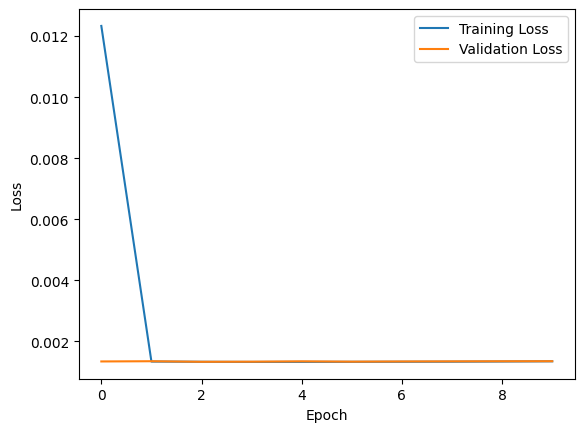

In [70]:
modelo_reg_ker = create_model_reg_ker()

history = modelo_reg_ker.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, verbose=1)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## D - Risco Empírico

- Calcule e **exiba o risco empírico** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [71]:
# Previsões
train_preds = modelo_reg_ker.predict(X_train)

# Dessnormalização
train_preds = scaler_y.inverse_transform(train_preds)
y_real_train = scaler_y.inverse_transform(y_train)

# Cálculo do Risco Empírico
empirical_risk = mean_squared_error(y_real_train, train_preds)
print(f'Risco Empírico: {empirical_risk}')

2428/2428 [==============================] - 2s 943us/step
Risco Empírico: 1414.387247988374



## E - Risco Estrutural

- Calcule e **exiba o risco estrutural** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [72]:
# Previsões
test_preds = modelo_reg_ker.predict(X_test)

# Dessnormalização
test_preds = scaler_y.inverse_transform(test_preds)
y_real_test = scaler_y.inverse_transform(y_test)

# Cálculo do Risco Estrutural
structural_risk = mean_squared_error(y_real_test, test_preds)
print(f'Risco Estrutural: {structural_risk}')

1214/1214 [==============================] - 1s 951us/step
Risco Estrutural: 1490.3427958033224


# Questão 4: Construção e Avaliação do Modelo com Dropout

Nesta questão, você irá construir, treinar e avaliar um modelo de rede neural. Siga as subinstruções com atenção para cada item.



## A - Construção do Modelo com regularização a utilização do Dropout

- **Crie uma função** que retorne um modelo de rede neural compilado.
  
- O modelo deve possuir as mesmas **10 camadas ocultas** da questão 2.
  
- Utilize técnicas de dropout no modelo seguindo as melhores práticas de acordo com as informações dos dados.


In [75]:
def create_model_dropout():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Camada de entrada
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.15)),
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Camada de saída
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

## B - Justificativa do Dropout

- **Justifique** a utilização a localização do dropout.

### Escreva neste bloco de markdown sua resposta
Foi utilizado após a camada com maior quantidade de neurônios, visando evitar overfitting devido à alta densidade de neurônios

## C - Treinamento do Modelo

- **Crie um modelo chamdo modelo_dropout** utilizando a função criada anteriormente

- **Treine o modelo** utilizando os dados de treinamento por **20 épocas**.
  
- **Exiba um gráfico** que mostre a evolução do loss de validação e treinamento ao longo das 20 épocas de treinamento.

Epoch 1/20
2428/2428 [==============================] - 5s 2ms/step - loss: 8.1967e-04 - val_loss: 7.7691e-04
Epoch 2/20
2428/2428 [==============================] - 4s 2ms/step - loss: 7.7077e-04 - val_loss: 8.1669e-04
Epoch 3/20
2428/2428 [==============================] - 4s 2ms/step - loss: 7.4770e-04 - val_loss: 7.4836e-04
Epoch 4/20
2428/2428 [==============================] - 4s 2ms/step - loss: 7.2772e-04 - val_loss: 7.4065e-04
Epoch 5/20
2428/2428 [==============================] - 5s 2ms/step - loss: 7.0709e-04 - val_loss: 7.2483e-04
Epoch 6/20
2428/2428 [==============================] - 7s 3ms/step - loss: 6.9460e-04 - val_loss: 7.1852e-04
Epoch 7/20
2428/2428 [==============================] - 5s 2ms/step - loss: 6.7923e-04 - val_loss: 7.4375e-04
Epoch 8/20
2428/2428 [==============================] - 5s 2ms/step - loss: 6.7567e-04 - val_loss: 6.9441e-04
Epoch 9/20
2428/2428 [==============================] - 5s 2ms/step - loss: 6.7099e-04 - val_loss: 7.3044e-04
Epoch 10/2

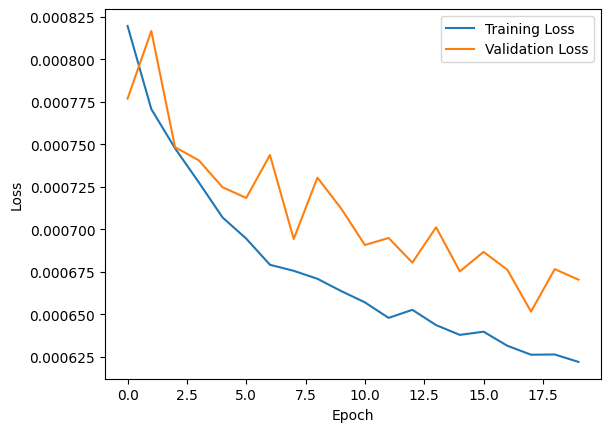

In [76]:
modelo_dropout = create_model_dropout()

history = modelo_dropout.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, verbose=1)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## D - Risco Empírico

- Calcule e **exiba o risco empírico** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [77]:
# Previsões
train_preds = modelo_dropout.predict(X_train)

# Dessnormalização
train_preds = scaler_y.inverse_transform(train_preds)
y_real_train = scaler_y.inverse_transform(y_train)

# Cálculo do Risco Empírico
empirical_risk = mean_squared_error(y_real_train, train_preds)
print(f'Risco Empírico: {empirical_risk}')

2428/2428 [==============================] - 2s 982us/step
Risco Empírico: 1028.3922853894444



## E - Risco Estrutural

- Calcule e **exiba o risco estrutural** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [78]:
# Previsões
test_preds = modelo_dropout.predict(X_test)

# Dessnormalização
test_preds = scaler_y.inverse_transform(test_preds)
y_real_test = scaler_y.inverse_transform(y_test)

# Cálculo do Risco Estrutural
structural_risk = mean_squared_error(y_real_test, test_preds)
print(f'Risco Estrutural: {structural_risk}')

1214/1214 [==============================] - 1s 1ms/step
Risco Estrutural: 1162.8179232232071


# Questão 5: Separação da Base de Treinamento

Divida o conjunto de dados de treinamento em 4 subconjuntos, cada um contendo 25% dos dados originais de treinamento.

## Instruções

- Divida a base de treinamento (`X_train` e `y_train`) em 4 subconjuntos, cada um com 25% dos dados.

- Nomeie os subconjuntos como `X_train_1`, `y_train_1`, `X_train_2`, `y_train_2`, e assim por diante.

In [79]:
from sklearn.model_selection import train_test_split

# Primeira divisão: dividindo os dados de treinamento em dois conjuntos temporários (50% / 50%)
X_temp_1, X_temp_2, y_temp_1, y_temp_2 = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Segunda divisão: dividindo X_temp_1 e y_temp_1 em dois conjuntos de 25%
X_train_1, X_train_2, y_train_1, y_train_2 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, random_state=42)

# Terceira divisão: dividindo X_temp_2 e y_temp_2 em dois conjuntos de 25%
X_train_3, X_train_4, y_train_3, y_train_4 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, random_state=42)

# Questão 6: Seleção e Treinamento de Modelos

Nesta questão, você irá selecionar o melhor dos 3 modelos com base nas questões anteriores.



## A - Seleção e Instanciação do Modelo

- **Selecione o melhor modelo** com base nos experimentos e métricas observadas nas questões anteriores.
- **Crie 4 instâncias** deste modelo utilizando a função correspondente.

```python
# Supondo que o melhor modelo seja 'create_model_dropout'
modelo_dropout_1 = create_model_dropout()
modelo_dropout_2 = create_model_dropout()
modelo_dropout_3 = create_model_dropout()
modelo_dropout_4 = create_model_dropout()


In [80]:
modelo_dropout_1 = create_model_dropout()
modelo_dropout_2 = create_model_dropout()
modelo_dropout_3 = create_model_dropout()
modelo_dropout_4 = create_model_dropout()

## B - Treinamento do Modelo 1 e Visualização do Gráfico

- **Treine o modelo 1** por 20 épocas utilizando `X_train_1` e `y_train_1`.
- **Exiba um gráfico** com os dados de loss dos dados de treinamento e validação.

Epoch 1/20


607/607 [==============================] - 1s 2ms/step - loss: 7.6870e-04 - val_loss: 8.1497e-04
Epoch 2/20
607/607 [==============================] - 1s 2ms/step - loss: 7.7374e-04 - val_loss: 7.4596e-04
Epoch 3/20
607/607 [==============================] - 1s 2ms/step - loss: 7.5259e-04 - val_loss: 7.3475e-04
Epoch 4/20
607/607 [==============================] - 1s 2ms/step - loss: 7.4584e-04 - val_loss: 7.3317e-04
Epoch 5/20
607/607 [==============================] - 1s 2ms/step - loss: 7.4418e-04 - val_loss: 7.3326e-04
Epoch 6/20
607/607 [==============================] - 1s 2ms/step - loss: 7.3670e-04 - val_loss: 7.3495e-04
Epoch 7/20
607/607 [==============================] - 1s 2ms/step - loss: 7.3181e-04 - val_loss: 7.4807e-04
Epoch 8/20
607/607 [==============================] - 1s 2ms/step - loss: 7.2649e-04 - val_loss: 7.4878e-04
Epoch 9/20
607/607 [==============================] - 1s 2ms/step - loss: 7.2313e-04 - val_loss: 7.5661e-04
Epoch 10/20
607/607 [==================

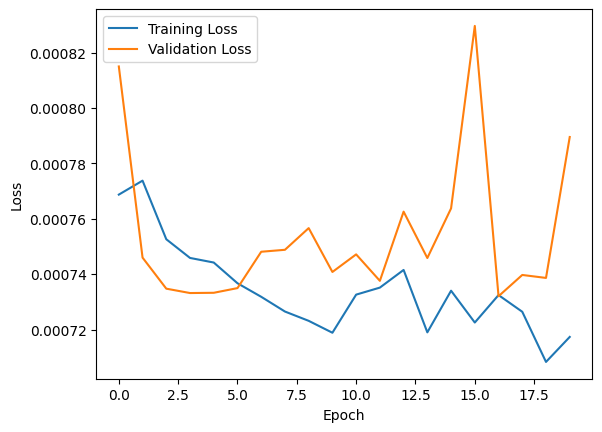

In [83]:
history = modelo_dropout_1.fit(X_train_1, y_train_1, validation_data=(X_val, y_val), epochs=20, verbose=1)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## C - Treinamento do Modelo 2 e Visualização do Gráfico

- **Treine o modelo 2** por 20 épocas utilizando `X_train_2` e `y_train_2`.
- **Exiba um gráfico** com os dados de loss dos dados de treinamento e validação.

Epoch 1/20


607/607 [==============================] - 3s 3ms/step - loss: 8.1090e-04 - val_loss: 8.3076e-04
Epoch 2/20
607/607 [==============================] - 2s 2ms/step - loss: 7.9145e-04 - val_loss: 8.1631e-04
Epoch 3/20
607/607 [==============================] - 1s 2ms/step - loss: 7.8730e-04 - val_loss: 8.2132e-04
Epoch 4/20
607/607 [==============================] - 1s 2ms/step - loss: 7.6950e-04 - val_loss: 7.7585e-04
Epoch 5/20
607/607 [==============================] - 2s 3ms/step - loss: 7.3678e-04 - val_loss: 0.0011
Epoch 6/20
607/607 [==============================] - 2s 3ms/step - loss: 7.3086e-04 - val_loss: 8.1776e-04
Epoch 7/20
607/607 [==============================] - 2s 3ms/step - loss: 7.1569e-04 - val_loss: 7.8035e-04
Epoch 8/20
607/607 [==============================] - 2s 3ms/step - loss: 7.0350e-04 - val_loss: 7.4080e-04
Epoch 9/20
607/607 [==============================] - 2s 3ms/step - loss: 6.9909e-04 - val_loss: 7.4303e-04
Epoch 10/20
607/607 [======================

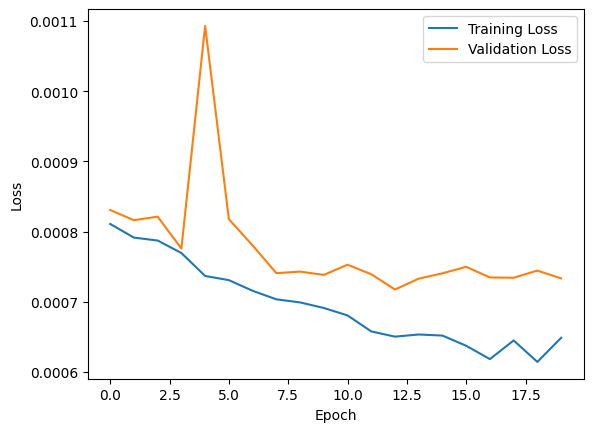

In [84]:
history = modelo_dropout_2.fit(X_train_2, y_train_2, validation_data=(X_val, y_val), epochs=20, verbose=1)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## D - Treinamento do Modelo 3 e Visualização do Gráfico

- **Treine o modelo 3** por 20 épocas utilizando `X_train_3` e `y_train_3`.
- **Exiba um gráfico** com os dados de loss dos dados de treinamento e validação.

Epoch 1/20
607/607 [==============================] - 3s 3ms/step - loss: 8.4276e-04 - val_loss: 8.3818e-04
Epoch 2/20
607/607 [==============================] - 2s 3ms/step - loss: 8.3296e-04 - val_loss: 8.4557e-04
Epoch 3/20
607/607 [==============================] - 2s 3ms/step - loss: 8.2636e-04 - val_loss: 8.1806e-04
Epoch 4/20
607/607 [==============================] - 2s 3ms/step - loss: 8.1651e-04 - val_loss: 8.1217e-04
Epoch 5/20
607/607 [==============================] - 2s 3ms/step - loss: 8.0231e-04 - val_loss: 7.9933e-04
Epoch 6/20
607/607 [==============================] - 2s 3ms/step - loss: 8.0255e-04 - val_loss: 7.8464e-04
Epoch 7/20
607/607 [==============================] - 2s 3ms/step - loss: 7.8270e-04 - val_loss: 7.7284e-04
Epoch 8/20
607/607 [==============================] - 2s 3ms/step - loss: 7.6629e-04 - val_loss: 7.8873e-04
Epoch 9/20
607/607 [==============================] - 2s 3ms/step - loss: 7.5742e-04 - val_loss: 7.6073e-04
Epoch 10/20
607/607 [=======

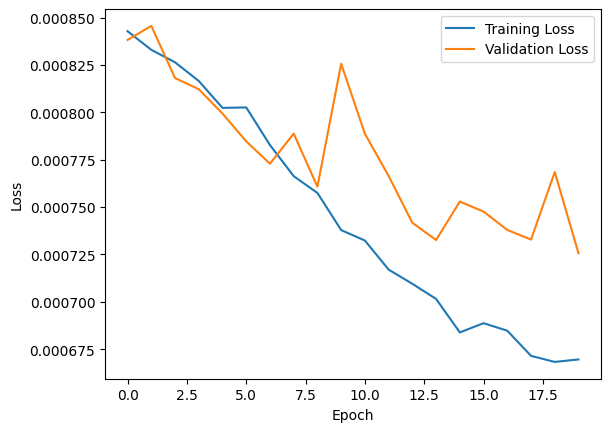

In [85]:
history = modelo_dropout_3.fit(X_train_3, y_train_3, validation_data=(X_val, y_val), epochs=20, verbose=1)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## E - Treinamento do Modelo 4 e Visualização do Gráfico

- **Treine o modelo 4** por 20 épocas utilizando `X_train_4` e `y_train_4`.
- **Exiba um gráfico** com os dados de loss dos dados de treinamento e validação.

Epoch 1/20
607/607 [==============================] - 3s 3ms/step - loss: 8.1849e-04 - val_loss: 8.3565e-04
Epoch 2/20
607/607 [==============================] - 2s 3ms/step - loss: 8.1213e-04 - val_loss: 8.2994e-04
Epoch 3/20
607/607 [==============================] - 2s 3ms/step - loss: 7.9972e-04 - val_loss: 8.2132e-04
Epoch 4/20
607/607 [==============================] - 2s 4ms/step - loss: 7.8430e-04 - val_loss: 7.8322e-04
Epoch 5/20
607/607 [==============================] - 2s 3ms/step - loss: 7.5552e-04 - val_loss: 7.7301e-04
Epoch 6/20
607/607 [==============================] - 2s 3ms/step - loss: 7.5186e-04 - val_loss: 8.2211e-04
Epoch 7/20
607/607 [==============================] - 2s 3ms/step - loss: 7.6109e-04 - val_loss: 7.7626e-04
Epoch 8/20
607/607 [==============================] - 2s 3ms/step - loss: 7.4637e-04 - val_loss: 7.7254e-04
Epoch 9/20
607/607 [==============================] - 2s 3ms/step - loss: 7.3600e-04 - val_loss: 7.6554e-04
Epoch 10/20
607/607 [=======

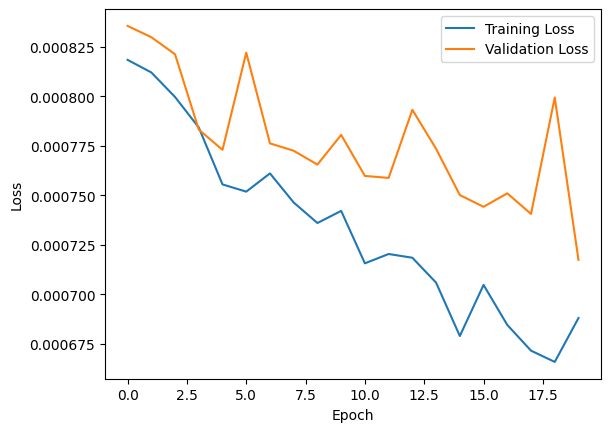

In [86]:
history = modelo_dropout_4.fit(X_train_4, y_train_4, validation_data=(X_val, y_val), epochs=20, verbose=1)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Questão 7: Erros dos Modelos


## A: Erro Estrutural dos Modelos

Nesta etapa, você deverá calcular e exibir o erro estrutural para cada um dos 4 modelos treinados na questão anterior. Lembre-se de que o erro estrutural deve ser calculado utilizando o conjunto de treinamento específico que foi usado para treinar cada modelo.

### Instruções:

- Calcule o erro estrutural para o `modelo_1` utilizando `X_train_1` e `y_train_1`.
- Calcule o erro estrutural para o `modelo_2` utilizando `X_train_2` e `y_train_2`.
- Calcule o erro estrutural para o `modelo_3` utilizando `X_train_3` e `y_train_3`.
- Calcule o erro estrutural para o `modelo_4` utilizando `X_train_4` e `y_train_4`.

### Nota:

Certifique-se de que os cálculos estão corretos (desnormalizados) e refletem o desempenho dos modelos nos dados com os quais foram treinados. Utilize métricas de erro apropriadas para avaliar o desempenho dos modelos e apresente os resultados de forma clara e concisa.

In [92]:
# Calculando e exibindo o erro estrutural para cada modelo com desnormalização

# Modelo 1
predicoes_1 = modelo_dropout_1.predict(X_train_1)
predicoes_1_desnorm = scaler_y.inverse_transform(predicoes_1)
erro_1 = mean_squared_error(scaler_y.inverse_transform(y_train_1), predicoes_1_desnorm)

# Modelo 2
predicoes_2 = modelo_dropout_2.predict(X_train_2)
predicoes_2_desnorm = scaler_y.inverse_transform(predicoes_2)
erro_2 = mean_squared_error(scaler_y.inverse_transform(y_train_2), predicoes_2_desnorm)

# Modelo 3
predicoes_3 = modelo_dropout_3.predict(X_train_3)
predicoes_3_desnorm = scaler_y.inverse_transform(predicoes_3)
erro_3 = mean_squared_error(scaler_y.inverse_transform(y_train_3), predicoes_3_desnorm)

# Modelo 4
predicoes_4 = modelo_dropout_4.predict(X_train_4)
predicoes_4_desnorm = scaler_y.inverse_transform(predicoes_4)
erro_4 = mean_squared_error(scaler_y.inverse_transform(y_train_4), predicoes_4_desnorm)


print(f"Erro Estrutural do Modelo 1: {erro_1:.2f}")
print(f"Erro Estrutural do Modelo 3: {erro_3:.2f}")
print(f"Erro Estrutural do Modelo 2: {erro_2:.2f}")
print(f"Erro Estrutural do Modelo 4: {erro_4:.2f}")

  1/607 [..............................] - ETA: 8s

607/607 [==============================] - 0s 708us/step
Erro Estrutural do Modelo 1: 1205.17
Erro Estrutural do Modelo 3: 1120.07
Erro Estrutural do Modelo 2: 999.67
Erro Estrutural do Modelo 4: 1065.64


## B: Erro Empírico dos Modelos

Nesta seção, você será solicitado a calcular e apresentar o erro empírico para cada um dos 4 modelos treinados anteriormente. É crucial lembrar que o erro empírico deve ser calculado utilizando o conjunto de teste, que é o mesmo para todos os 4 modelos.

### Instruções:

- Calcule o erro empírico para o `modelo_1` utilizando o conjunto de teste (`X_test` e `y_test`).
- Calcule o erro empírico para o `modelo_2` utilizando o conjunto de teste (`X_test` e `y_test`).
- Calcule o erro empírico para o `modelo_3` utilizando o conjunto de teste (`X_test` e `y_test`).
- Calcule o erro empírico para o `modelo_4` utilizando o conjunto de teste (`X_test` e `y_test`).

### Nota:

Assegure-se de que os cálculos estejam corretos (desnormalizados) e que reflitam adequadamente o desempenho dos modelos no conjunto de teste. Utilize métricas de erro apropriadas para avaliar o desempenho dos modelos e apresente os resultados de maneira clara e concisa.

In [93]:
# Calculando e exibindo o erro empírico para cada modelo com desnormalização

# Modelo 1
predicoes_teste_1 = modelo_dropout_1.predict(X_test)
predicoes_teste_1_desnorm = scaler_y.inverse_transform(predicoes_teste_1)
erro_teste_1 = mean_squared_error(scaler_y.inverse_transform(y_test), predicoes_teste_1_desnorm)  # RMSE

# Modelo 2
predicoes_teste_2 = modelo_dropout_2.predict(X_test)
predicoes_teste_2_desnorm = scaler_y.inverse_transform(predicoes_teste_2)
erro_teste_2 = mean_squared_error(scaler_y.inverse_transform(y_test), predicoes_teste_2_desnorm)  # RMSE

# Modelo 3
predicoes_teste_3 = modelo_dropout_3.predict(X_test)
predicoes_teste_3_desnorm = scaler_y.inverse_transform(predicoes_teste_3)
erro_teste_3 = mean_squared_error(scaler_y.inverse_transform(y_test), predicoes_teste_3_desnorm)  # RMSE

# Modelo 4
predicoes_teste_4 = modelo_dropout_4.predict(X_test)
predicoes_teste_4_desnorm = scaler_y.inverse_transform(predicoes_teste_4)
erro_teste_4 = mean_squared_error(scaler_y.inverse_transform(y_test), predicoes_teste_4_desnorm)  # RMSE

print(f"Erro Empírico do Modelo 1: {erro_teste_1:.2f}")
print(f"Erro Empírico do Modelo 2: {erro_teste_2:.2f}")
print(f"Erro Empírico do Modelo 3: {erro_teste_3:.2f}")
print(f"Erro Empírico do Modelo 4: {erro_teste_4:.2f}")


   1/1214 [..............................] - ETA: 27s

1214/1214 [==============================] - 1s 754us/step
Erro Empírico do Modelo 1: 1352.73
Erro Empírico do Modelo 2: 1249.15
Erro Empírico do Modelo 3: 1285.57
Erro Empírico do Modelo 4: 1314.02


## Questão 8: Flexibilidade do Modelo

Nesta questão, você deverá avaliar e justificar se o modelo selecionado é flexível.

### Instruções:

- **Avalie** se o modelo escolhido é flexível.
- **Justifique** sua resposta, considerando aspectos como a capacidade do modelo de se adaptar a diferentes formas dos dados, a complexidade do modelo, entre outros aspectos relevantes.

**Nota:** Sua justificativa deve ser embasada em aspectos técnicos e nas observações feitas durante o treinamento e avaliação do modelo. Lembre-se de que a flexibilidade do modelo está relacionada à sua capacidade de aprender e adaptar-se a diferentes padrões nos dados.

### Escreva neste bloco de markdown sua resposta
Sim pois todos os 4 modelos ficaram com os riscos empíricos e estruturais semelhantes

## Questão 9: Visualização Gráfica do melhor dos 4 modelos

Nesta questão, você deverá:

- **Selecionar o melhor modelo** dentre os modelos simples, com regularização de kernel e com dropout (O melhor modelo selecionado anteriormente).
- **Gerar previsões** para o conjunto de teste.
- **Gerar um gráfico de linha** com uma comparação entre os 200 primeiros valores reais e os preditos no conjunto de teste.


**Nota:** Certifique-se de desnormalizar os valores antes de gerar o gráfico

1214/1214 [==============================] - 1s 663us/step


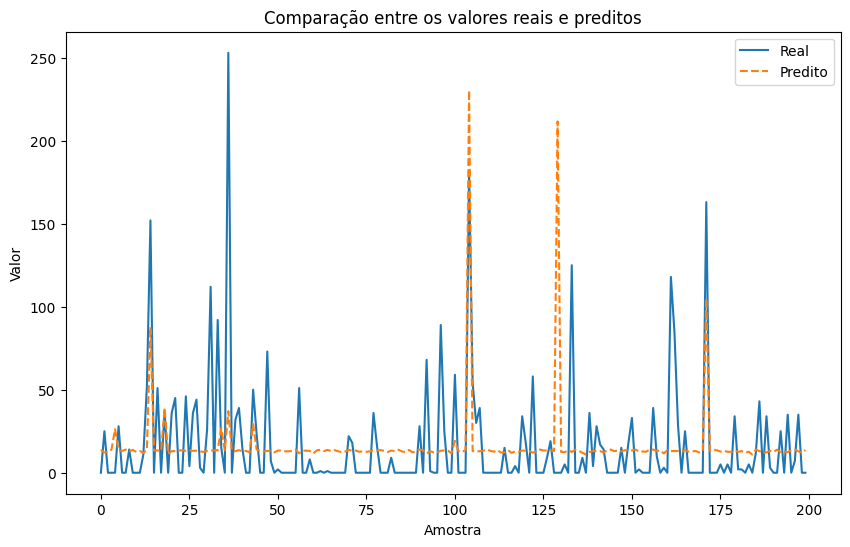

In [102]:
predicoes = modelo_dropout.predict(X_test)

predicoes = scaler_y.inverse_transform(predicoes)
y_test_desnorm = scaler_y.inverse_transform(y_test)

# Plotando os 50 primeiros valores reais e preditos
plt.figure(figsize=(10, 6))
plt.plot(y_test_desnorm[:200], label='Real')
plt.plot(predicoes[:200], label='Predito', linestyle='dashed')
plt.title('Comparação entre os valores reais e preditos')
plt.xlabel('Amostra')
plt.ylabel('Valor')
plt.legend()
plt.show()

## Questão 10: Análise dos Resultados para a Questão Principal da Prova

Nesta questão, você será solicitado a realizar uma análise crítica dos resultados obtidos e relacioná-los com a questão principal da prova.

**Nota:** Suas respostas devem ser bem fundamentadas, utilizando como base os conhecimentos técnicos adquiridos durante o curso e as observações feitas durante a realização da prova.


#### A - Análise de Underfitting
- **Analise** o gráfico gerado na questão anterior e as métricas do modelo selecionado.
- **Responda**: O modelo apresenta underfitting?
- **Justifique** sua resposta com base em suas observações e conhecimento técnico.

### Escreva neste bloco de markdown sua resposta
Aparentemente sim, o modelo aparenta estar bom para prever alguns valores de pico, mas na maioria das previsões, os valores não estão seguindo uma tendência semelhante aos valores reais e os erros médios estão muito elevados, visto que a classe alvo é em minutos, um erro médio quadrático de 1000 é muito alto.


#### B - Relevância dos Atributos para Previsão
- **Refletindo** sobre a questão principal da prova, considere os atributos presentes na base de dados.
- **Responda**: Os atributos disponíveis parecem ser suficientemente relevantes para prever o tempo de atraso dos voos?
- **Não** precisa Justificar a resposta.

### Escreva neste bloco de markdown sua resposta
Não